# Morphological Transformations: erosion and dilation
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [30]:
import cv2
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from PIL import Image

from src.config import DATA_PATH

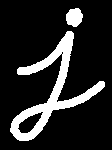

In [8]:
image = cv2.imread(path.join(DATA_PATH, "j.png"), cv2.IMREAD_GRAYSCALE)
Image.fromarray(image)

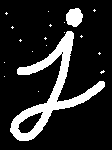

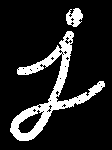

In [68]:
# Add noise white
image_noised_white = image.copy()
for _ in range(30):
    image_noised_white = cv2.circle(image_noised_white,
                                    (randint(0, image.shape[0]),
                                     randint(0, image.shape[1])),
                                    randint(0, 2), (255,), -1
                                   )
Image.fromarray(image_noised_white)

# Add noise black
image_noised_black = image.copy()
for _ in range(500):
    image_noised_black = cv2.circle(image_noised_black,
                                    (randint(0, image.shape[0]),
                                     randint(0, image.shape[1])),
                                    randint(0, 2), (0,), -1
                                   )
Image.fromarray(image_noised_black)

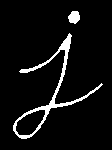

In [14]:
# Erosion
kernel = np.ones((3, 3), np.uint8)
image_transformed = cv2.erode(image, kernel, iterations=2)

Image.fromarray(image_transformed)

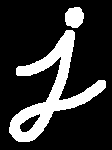

In [48]:
# Dilation
kernel = np.ones((3, 3), np.uint8)
image_transformed = cv2.dilate(image, kernel, iterations=1)
# image_transformed = cv2.erode(image_transformed, kernel, iterations=2)
Image.fromarray(image_transformed)

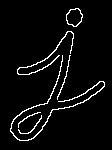

In [28]:
# For fun!!!
kernel = np.ones((3, 3), np.uint8)
image_transformed = cv2.dilate(image, kernel, iterations=1)
image_transformed = cv2.erode(image_transformed, kernel, iterations=2)

Image.fromarray(image - image_transformed)

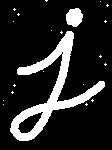

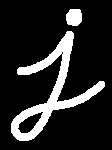

In [69]:
# opening: erosion by dilation
kernel = np.ones((5, 5), np.uint8)
image_transformed = cv2.morphologyEx(image_noised_white, cv2.MORPH_OPEN,
                                     kernel)
Image.fromarray(image_noised)
Image.fromarray(image_transformed)

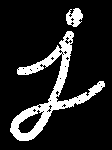

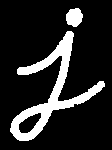

In [70]:
# closing: erosion by dilation
kernel = np.ones((3, 3), np.uint8)
image_transformed = cv2.morphologyEx(image_noised_black, cv2.MORPH_CLOSE,
                                     kernel)
Image.fromarray(image_noised_black)
Image.fromarray(image_transformed)

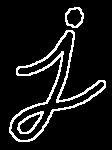

In [80]:
# Morphological gradient
kernel = np.ones((3, 3), np.uint8)
image_transformed = cv2.morphologyEx(image, cv2.MORPH_GRADIENT,
                                     kernel, iterations=1)
Image.fromarray(image_transformed)

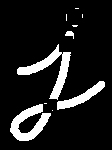

In [86]:
# Top Hat
kernel = np.ones((9, 9), np.uint8)
image_transformed = cv2.morphologyEx(image, cv2.MORPH_TOPHAT,
                                     kernel, iterations=1)
Image.fromarray(image_transformed)

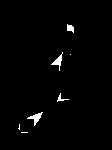

In [87]:
# Black Hat
kernel = np.ones((9, 9), np.uint8)
image_transformed = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT,
                                     kernel, iterations=1)
Image.fromarray(image_transformed)

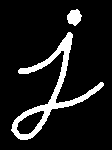

In [91]:
# Black Hat
kernel = np.ones((3, 3), np.uint8)
image_transformed = cv2.morphologyEx(image, cv2.MORPH_HITMISS,
                                     kernel, iterations=1)
Image.fromarray(image_transformed)

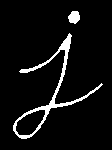

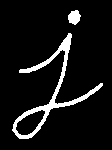

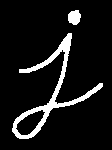

In [96]:
# Custom structuring element with erosion

kernel_recrangle = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel_elliptical = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))


image_transformed_rectangle = cv2.morphologyEx(image,cv2.MORPH_ERODE,
                                               kernel_recrangle)
image_transformed_ellipse = cv2.morphologyEx(image, cv2.MORPH_ERODE,
                                             kernel_elliptical)
image_transformed_cross = cv2.morphologyEx(image, cv2.MORPH_ERODE,
                                             kernel_cross)

Image.fromarray(image_transformed_rectangle)
Image.fromarray(image_transformed_ellipse)
Image.fromarray(image_transformed_cross)